In [2]:
import mne
import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt

In [3]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('./alchoholdataset/SMNI_CMI_TRAIN/*.csv')):
    _dfs_list.append(pd.read_csv(csv_filename))
df = pd.concat(_dfs_list)
del(_dfs_list)
df = df.drop(['Unnamed: 0'], axis=1)
df.head(3)

100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:14<00:00, 32.44it/s]


trial number sensor position  sample num  sensor value subject identifier  \
0             0             FP1           0        -8.921                  a   
1             0             FP1           1        -8.433                  a   
2             0             FP1           2        -2.574                  a   

  matching condition  channel         name      time  
0             S1 obj        0  co2a0000364  0.000000  
1             S1 obj        0  co2a0000364  0.003906  
2             S1 obj        0  co2a0000364  0.007812

In [4]:
channel_list = list(set(df['sensor position']))
print(channel_list)
channel_list.sort()

channel_mapping = {
    'AFZ':'AFz', 
    'CPZ':'CPz', 
    'CZ':'Cz', 
    'FCZ':'FCz', 
    'FP1':'Fp1',
    'FP2':'Fp2', 
    'FPZ':'Fpz', 
    'FZ':'Fz', 
    'OZ':'Oz', 
    'POZ':'POz', 
    'PZ':'Pz',
}
channel_mapping_full = dict()

for ch in channel_list:
    if ch in channel_mapping:
        channel_mapping_full[ch] = channel_mapping[ch]
    else:
        channel_mapping_full[ch] = ch

channel_list_fixed = [channel_mapping_full[ch] for ch in channel_list]
        
df['sensor position'] = df['sensor position'].map(channel_mapping_full)
df.head(3)

['AF8', 'CZ', 'FC1', 'F7', 'PO7', 'O2', 'FCZ', 'CP1', 'POZ', 'FT7', 'FP2', 'FC2', 'F6', 'C1', 'TP8', 'CPZ', 'F5', 'C6', 'OZ', 'FC5', 'Y', 'FC6', 'FT8', 'F3', 'PO1', 'C2', 'FZ', 'AF7', 'FC3', 'P7', 'O1', 'P4', 'PO8', 'F8', 'FP1', 'P8', 'AF1', 'CP3', 'P6', 'F1', 'AF2', 'nd', 'FPZ', 'F4', 'CP5', 'AFZ', 'C4', 'P3', 'PO2', 'T8', 'C3', 'CP6', 'F2', 'T7', 'C5', 'P2', 'FC4', 'P5', 'PZ', 'X', 'TP7', 'CP4', 'P1', 'CP2']


trial number sensor position  sample num  sensor value subject identifier  \
0             0             Fp1           0        -8.921                  a   
1             0             Fp1           1        -8.433                  a   
2             0             Fp1           2        -2.574                  a   

  matching condition  channel         name      time  
0             S1 obj        0  co2a0000364  0.000000  
1             S1 obj        0  co2a0000364  0.003906  
2             S1 obj        0  co2a0000364  0.007812

In [5]:
transposed_df_list = []

for group_df in tqdm(df.groupby(['name', 'trial number', 'matching condition', 'sensor position', 'subject identifier'])):
    _df = pd.DataFrame(group_df[1]['sensor value']).T
    _df.columns = [f'sample_{idx}' for idx in range(256)]
    _df['name'] = group_df[0][0]
    _df['trial number'] = group_df[0][1]
    _df['matching condition'] = group_df[0][2]
    _df['sensor position'] = group_df[0][3]
    _df['subject identifier'] = group_df[0][4]
    
    transposed_df_list.append(_df)
df = pd.concat(transposed_df_list)
df = df[[*df.columns[-5:],*df.columns[0:-5]]]
df = df.reset_index(drop=True)
df.head(3)

100%|███████████████████████████████████████████████████████████████████████████| 29952/29952 [01:17<00:00, 386.71it/s]


name  trial number matching condition sensor position  \
0  co2a0000364             0             S1 obj             AF1   
1  co2a0000364             0             S1 obj             AF2   
2  co2a0000364             0             S1 obj             AF7   

  subject identifier  sample_0  sample_1  sample_2  sample_3  sample_4  ...  \
0                  a    -2.146    -2.146    -1.658    -0.682     2.248  ...   
1                  a     1.129     0.641    -0.336    -0.824     0.641  ...   
2                  a   -16.856    -7.090     7.558    19.277    23.183  ...   

   sample_246  sample_247  sample_248  sample_249  sample_250  sample_251  \
0      -1.658       0.295       2.736       4.201       3.713       1.272   
1       4.059      -0.336      -2.777      -0.824       3.571       5.035   
2      17.324       9.511       1.699      -2.207      -2.207       1.211   

   sample_252  sample_253  sample_254  sample_255  
0      -0.682      -0.193       3.225       7.619  
1       4.059       2.106       1.617       4.059  
2       5.117       8.046      10.000      11.464  

[3 rows x 261 columns]

In [6]:
def get_record_df(df, name, trial_number, matching_condition, channel_list):
    df_record = df[df['name'].eq(name) & df['trial number'].eq(trial_number) & df['matching condition'].eq(matching_condition)].set_index(['sensor position']).loc[channel_list]
    return df_record

df_record = get_record_df(df, 'co2a0000364', 0, 'S1 obj', channel_list_fixed)
df_record

name  trial number matching condition  \
sensor position                                                 
AF1              co2a0000364             0             S1 obj   
AF2              co2a0000364             0             S1 obj   
AF7              co2a0000364             0             S1 obj   
AF8              co2a0000364             0             S1 obj   
AFz              co2a0000364             0             S1 obj   
...                      ...           ...                ...   
TP7              co2a0000364             0             S1 obj   
TP8              co2a0000364             0             S1 obj   
X                co2a0000364             0             S1 obj   
Y                co2a0000364             0             S1 obj   
nd               co2a0000364             0             S1 obj   

                subject identifier  sample_0  sample_1  sample_2  sample_3  \
sensor position                                                              
AF1                              a    -2.146    -2.146    -1.658    -0.682   
AF2                              a     1.129     0.641    -0.336    -0.824   
AF7                              a   -16.856    -7.090     7.558    19.277   
AF8                              a   -10.020    -7.090     1.211    10.488   
AFz                              a    -0.987    -1.475    -0.987    -0.010   
...                            ...       ...       ...       ...       ...   
TP7                              a    -9.338   -12.268    -8.850    -1.526   
TP8                              a    -3.082    -4.059    -3.571    -1.129   
X                                a    -5.269    -5.758    -2.828     1.567   
Y                                a    -5.636    -2.706     1.689     5.595   
nd                               a    -8.901    -7.924    -3.042     4.771   

                 sample_4  sample_5  ...  sample_246  sample_247  sample_248  \
sensor position                      ...                                       
AF1                 2.248     5.178  ...      -1.658       0.295       2.736   
AF2                 0.641     3.571  ...       4.059      -0.336      -2.777   
AF7                23.183    18.789  ...      17.324       9.511       1.699   
AF8                13.906    10.976  ...      28.554      27.089      15.859   
AFz                 2.431     4.873  ...       0.478      -0.498      -0.498   
...                   ...       ...  ...         ...         ...         ...   
TP7                 4.822     7.263  ...      19.958      14.587       3.357   
TP8                 2.777     6.195  ...       2.777       2.289       0.824   
X                   5.961     9.379  ...      19.145      18.168      16.215   
Y                   9.013    10.478  ...      24.150      20.243      11.454   
nd                 11.607    14.048  ...      11.119       8.677       5.259   

                 sample_249  sample_250  sample_251  sample_252  sample_253  \
sensor position                                                               
AF1                   4.201       3.713       1.272      -0.682      -0.193   
AF2                  -0.824       3.571       5.035       4.059       2.106   
AF7                  -2.207      -2.207       1.211       5.117       8.046   
AF8                   0.722     -10.020     -10.997      -2.696       9.511   
AFz                   0.478       0.966       0.966       0.966       0.478   
...                     ...         ...         ...         ...         ...   
TP7                  -6.897      -9.827      -3.967       6.775      14.587   
TP8                   0.336       1.312       3.265       4.242       2.777   
X                    13.774      10.844       8.891       8.891      11.820   
Y                     4.618       3.153       6.571      12.431      15.849   
nd                    2.818       2.330       3.306       4.283       4.771   

                 sample_254  sample_255  
sensor position                          
AF1       

In [7]:
def get_signal_array(df, name, trial_number, matching_condition, channel_list):
    df_record = get_record_df(df, name, trial_number, matching_condition, channel_list)
    return df_record.to_numpy()[:, 4:]

signal_array = get_signal_array(df, 'co2a0000364', 10, 'S1 obj', channel_list_fixed)
signal_array.shape

(64, 256)

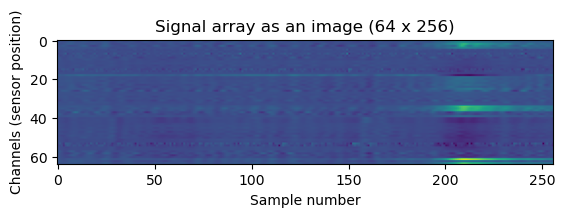

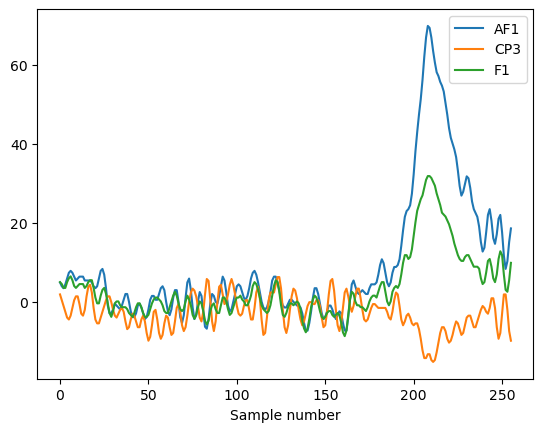

In [8]:
plt.title('Signal array as an image (64 x 256)')
plt.ylabel('Channels (sensor position)');
plt.xlabel('Sample number');
plt.imshow(signal_array.astype(int));
plt.show()

channels_to_display = ['AF1', 'CP3', 'F1']
for channel in channels_to_display:
    plt.xlabel('Sample number');
    plt.plot(signal_array[channel_list.index(channel)]);
plt.legend(channels_to_display);

In [9]:
info = mne.create_info(ch_names=channel_list_fixed, sfreq=256, ch_types=['eeg']*64)
raw = mne.io.RawArray(signal_array, info)

standard_1020_montage = mne.channels.make_standard_montage('standard_1020');
raw.drop_channels(['X', 'Y', 'nd'])
raw.set_montage(standard_1020_montage)

Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.


<RawArray | 61 x 256 (1.0 s), ~208 kB, data loaded>

In [10]:
raw.plot_psd();
raw.plot_psd(average=True);

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)


C:\Users\Dedu\anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Dedu\anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


In [11]:
raw_filtered = raw.copy().filter(8,30, verbose=False);
raw_filtered.plot_psd();
raw_filtered.plot_psd(average=True);

C:\Users\Dedu\AppData\Local\Temp\ipykernel_14740\2099550416.py:1: RuntimeWarning: filter_length (423) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  raw_filtered = raw.copy().filter(8,30, verbose=False);


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)


C:\Users\Dedu\anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Dedu\anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


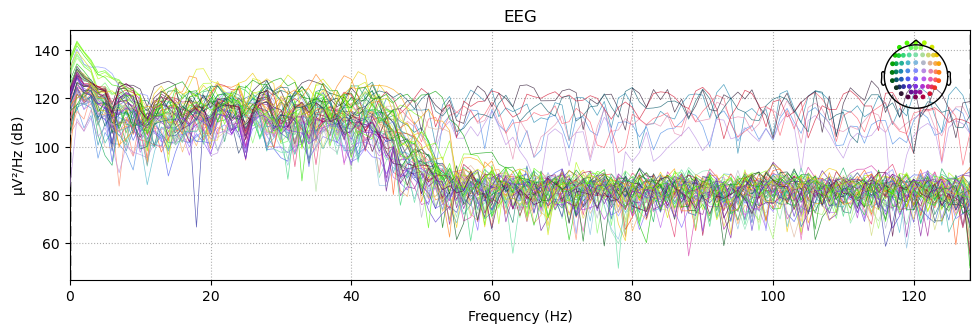

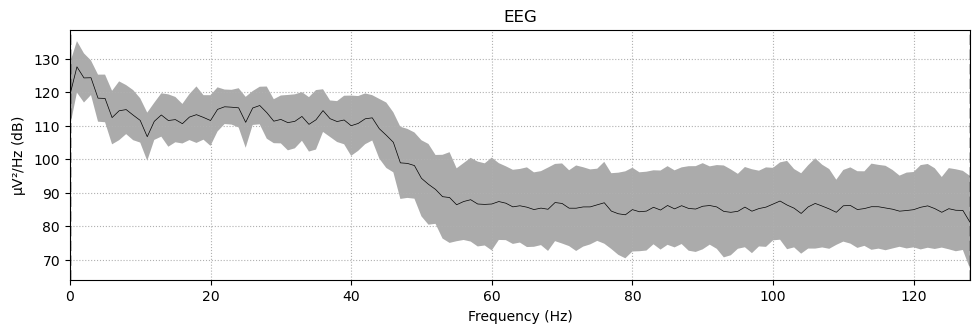

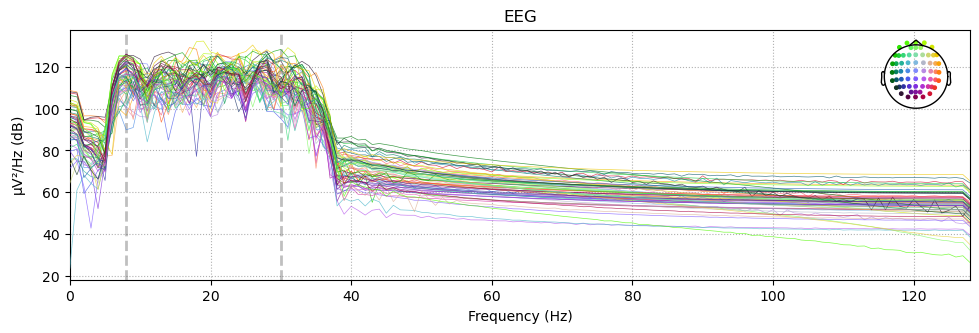

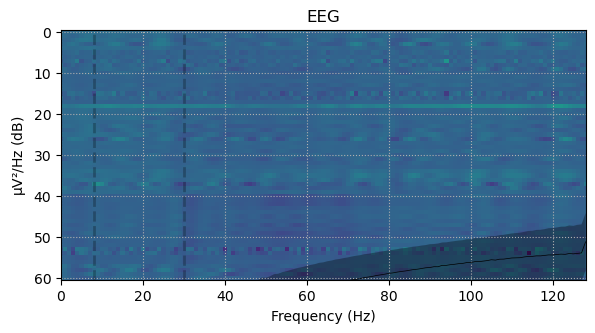

C:\Users\Dedu\AppData\Local\Temp\ipykernel_14740\3450553692.py:3: RuntimeWarning: filter_length (845) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  plt.imshow(raw.copy().filter(1,10, verbose=False).get_data());


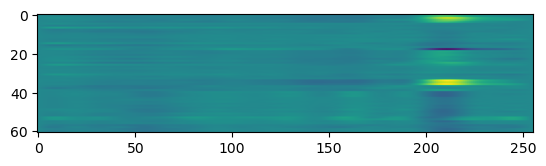

C:\Users\Dedu\AppData\Local\Temp\ipykernel_14740\3450553692.py:6: RuntimeWarning: filter_length (423) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  plt.plot(raw.copy().filter(8,30, verbose=False).get_data()[40])


In [12]:
plt.imshow(raw.get_data())
plt.show()
plt.imshow(raw.copy().filter(1,10, verbose=False).get_data());
plt.show()
plt.plot(raw.copy().get_data()[40])
plt.plot(raw.copy().filter(8,30, verbose=False).get_data()[40])

 -------------------*********** For Band: Delta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.3s.


C:\Users\Dedu\AppData\Local\Temp\ipykernel_14740\919513845.py:33: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (52) and smallest (2e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 9
  ica.fit(raw_band)


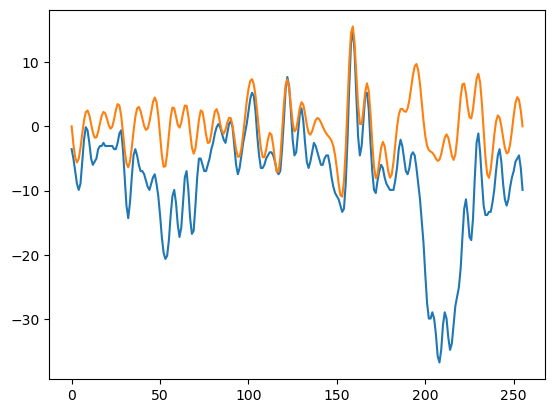

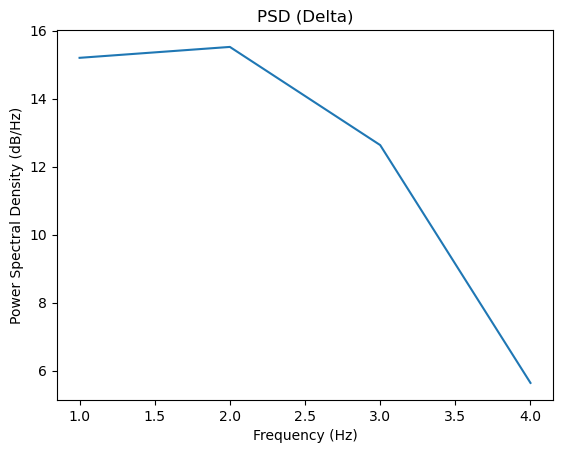

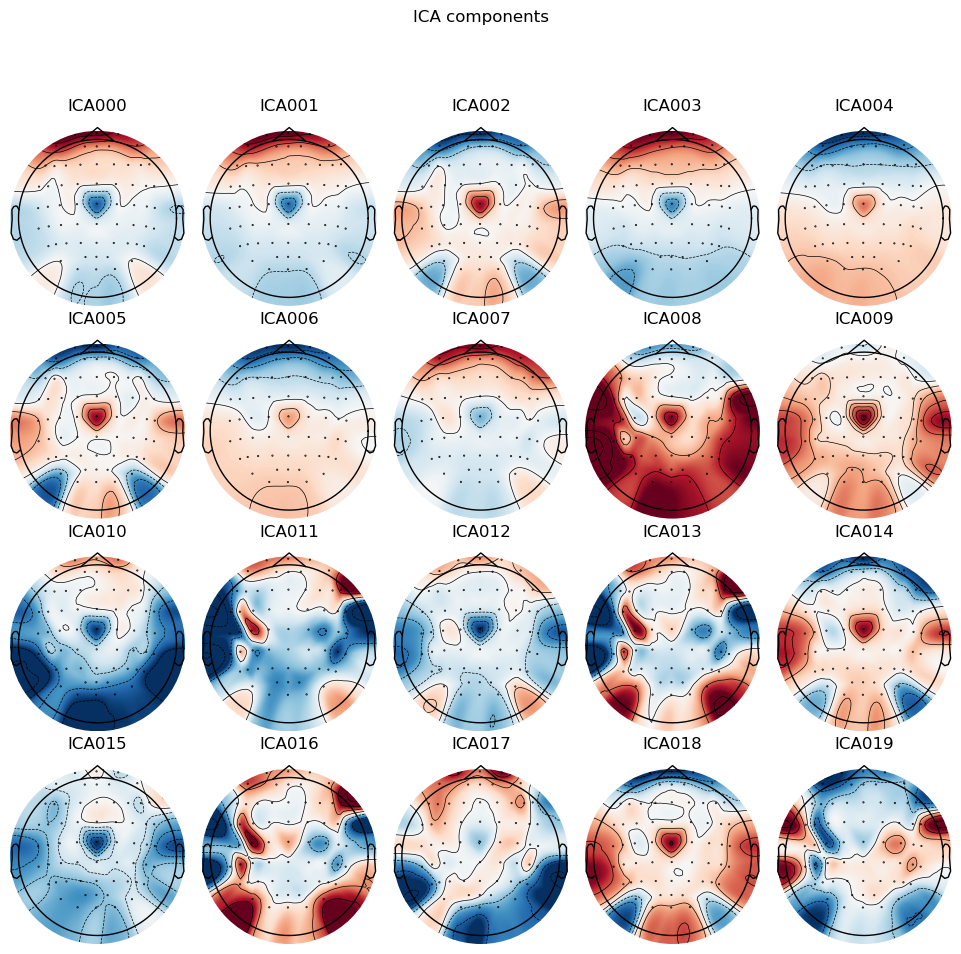

C:\Users\Dedu\AppData\Local\Temp\ipykernel_14740\919513845.py:40: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=256).
  plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])


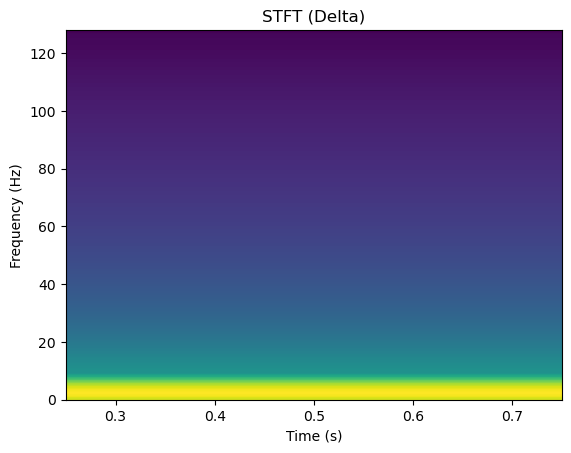

 -------------------*********** For Band: Theta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.1s.


C:\Users\Dedu\AppData\Local\Temp\ipykernel_14740\919513845.py:33: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (55) and smallest (5.8e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw_band)


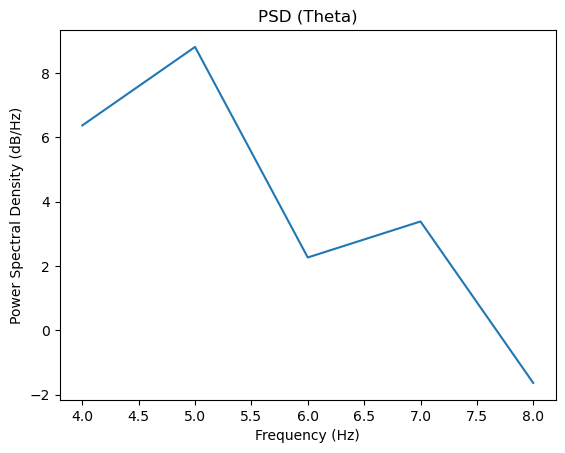

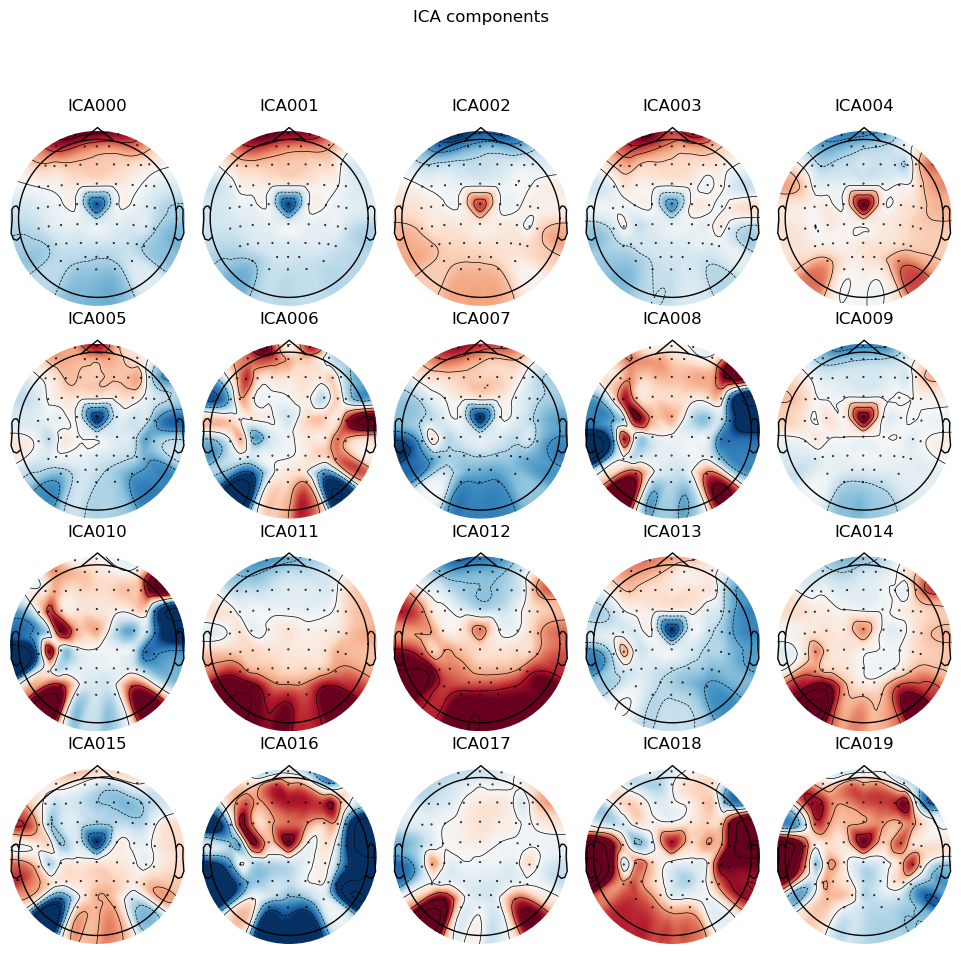

C:\Users\Dedu\AppData\Local\Temp\ipykernel_14740\919513845.py:40: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=256).
  plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])


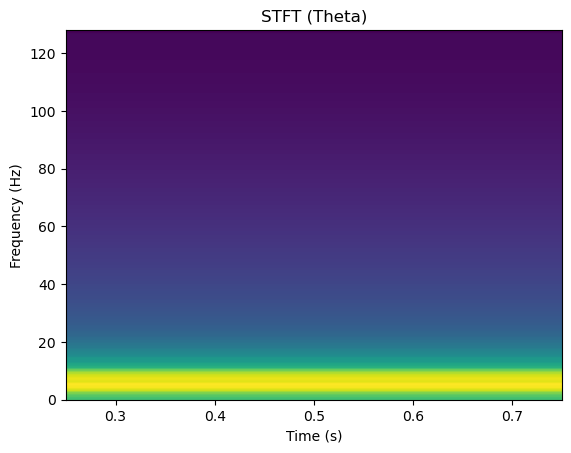

 -------------------*********** For Band: Alpha  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.1s.


C:\Users\Dedu\AppData\Local\Temp\ipykernel_14740\919513845.py:33: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (32) and smallest (6.9e-07) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 15
  ica.fit(raw_band)


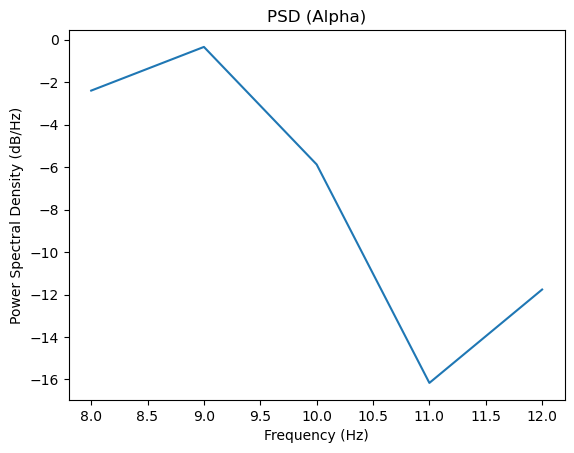

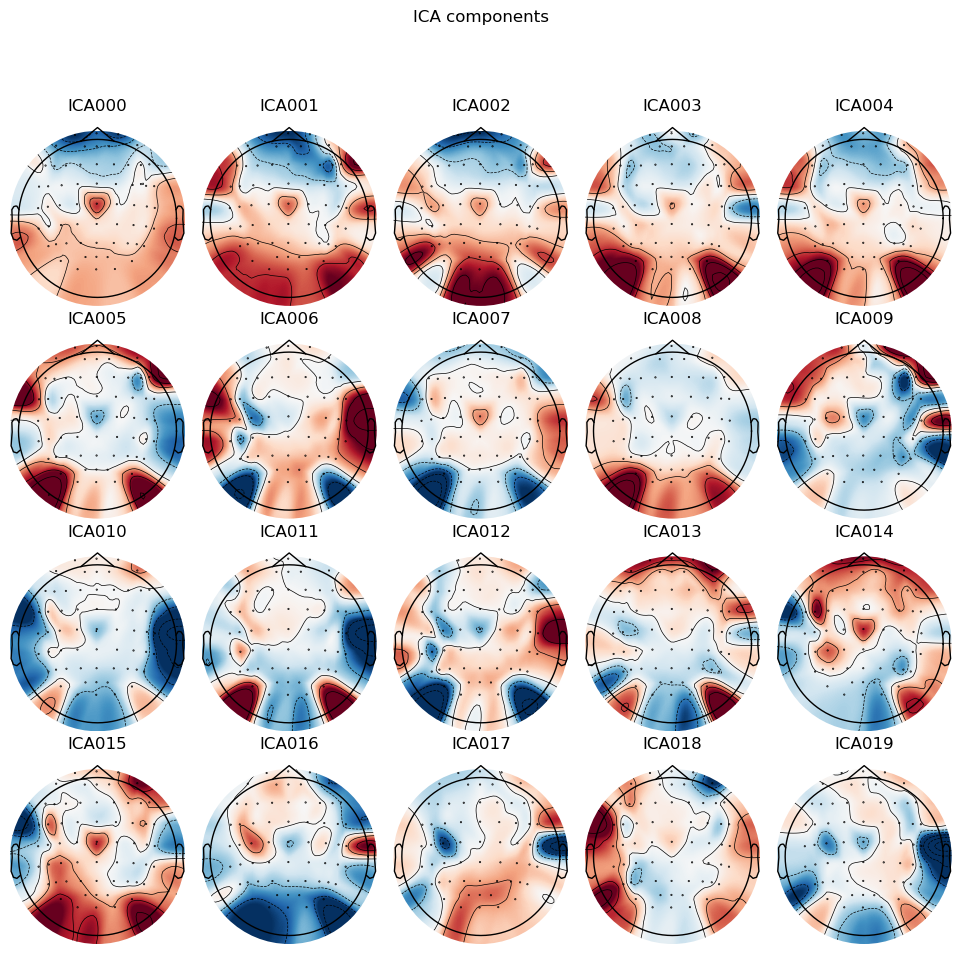

C:\Users\Dedu\AppData\Local\Temp\ipykernel_14740\919513845.py:40: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=256).
  plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])


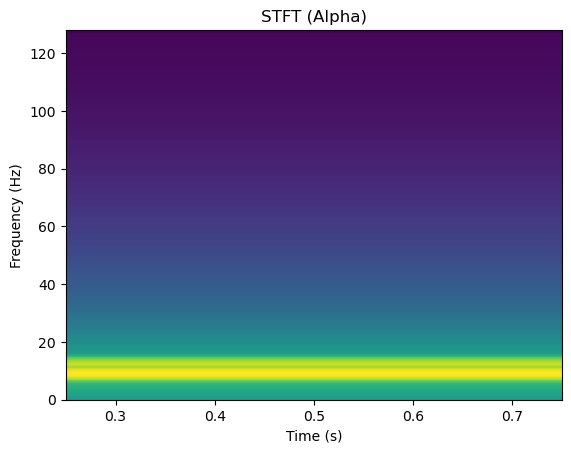

 -------------------*********** For Band: Beta  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 12.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.1s.


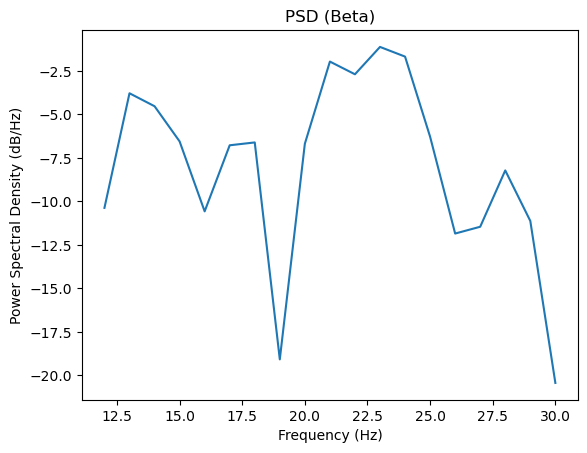

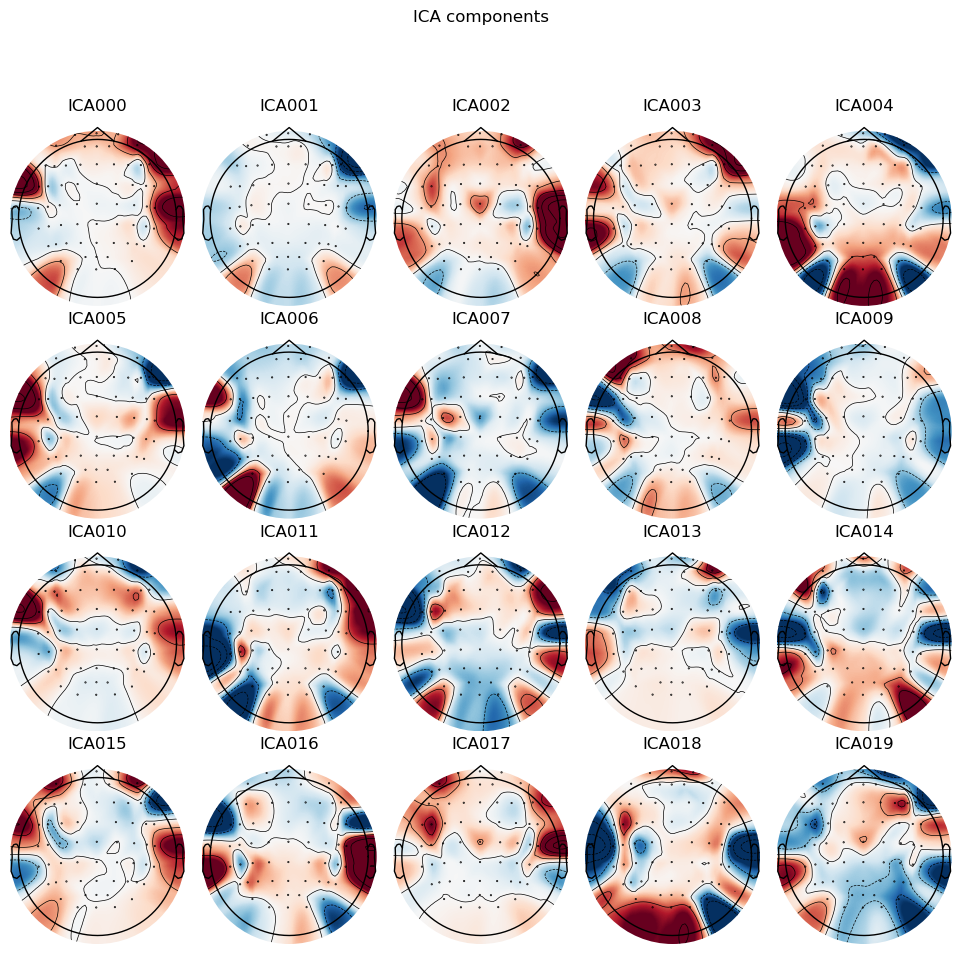

C:\Users\Dedu\AppData\Local\Temp\ipykernel_14740\919513845.py:40: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=256).
  plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])


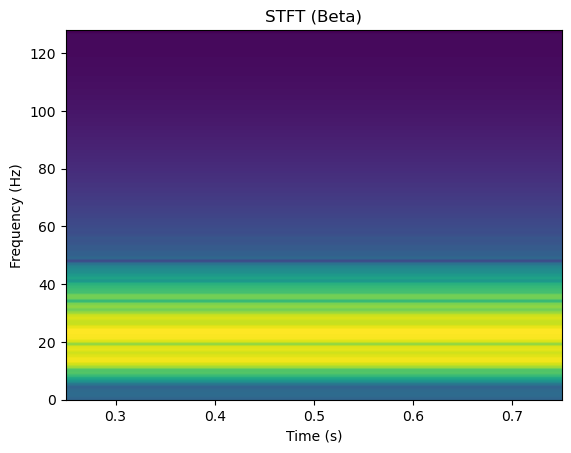

 -------------------*********** For Band: Gamma  ****************---------------------------------
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.1s.


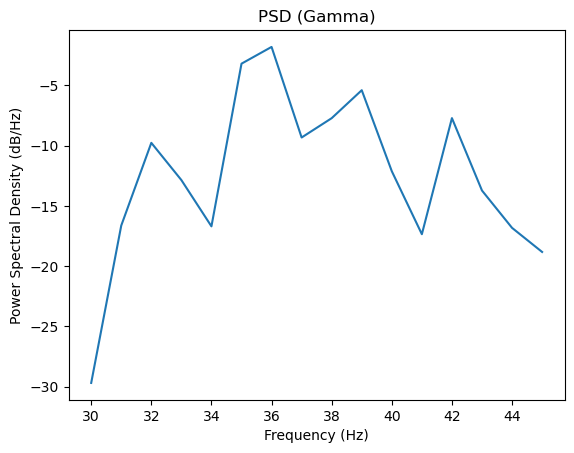

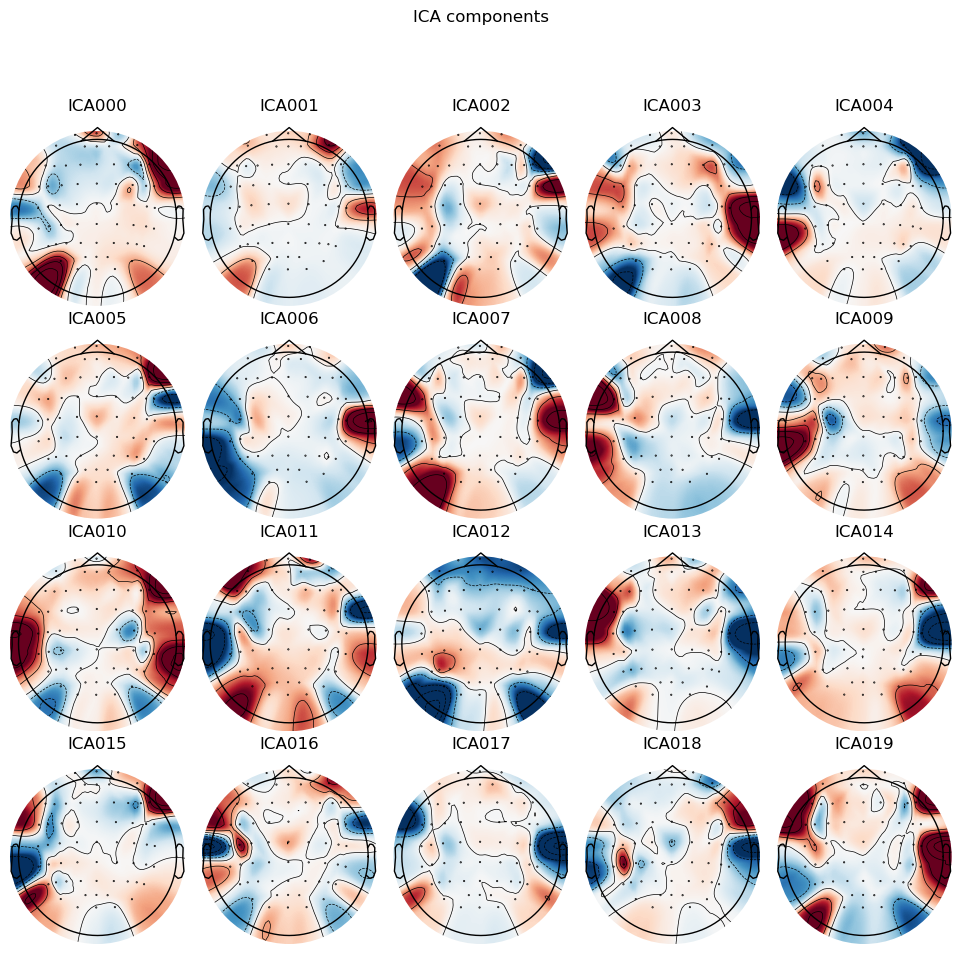

C:\Users\Dedu\AppData\Local\Temp\ipykernel_14740\919513845.py:40: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=256).
  plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])


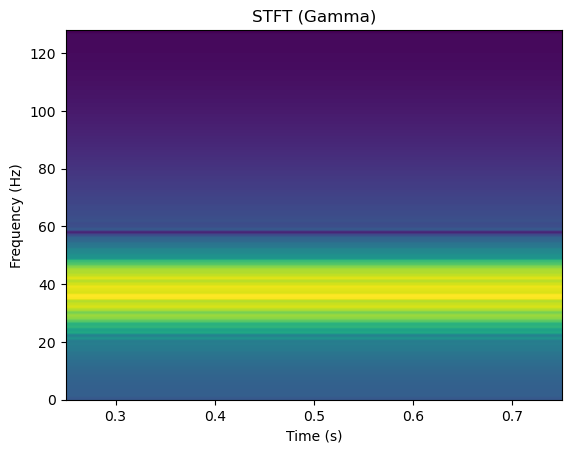

In [13]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import time
# Load the raw data
#raw = mne.io.read_raw_fif('data/raw.fif', preload=True)

# Define frequency bands of interest
freq_bands = {'Delta': (1, 4),
              'Theta': (4, 8),
              'Alpha': (8, 12),
              'Beta': (12, 30),
              'Gamma': (30, 45)}

# Loop through each frequency band
for band, (fmin, fmax) in freq_bands.items():
    # Filter the raw data to the frequency band of interest
    print(" -------------------*********** For Band:",band," ****************---------------------------------")
    raw_band = raw.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Plot PSD
    plt.figure()
    plt.plot(freqs, 10 * np.log10(psd))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('PSD ({})'.format(band))
    time.sleep(10) 
    # Calculate ICA
    ica = mne.preprocessing.ICA(n_components=20, random_state=42)
    ica.fit(raw_band)

    # Plot ICA
    ica.plot_components()

    # Plot STFT
    plt.figure()
    plt.specgram(raw_band.get_data()[0], Fs=raw_band.info['sfreq'])
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('STFT ({})'.format(band))

    # Show all figures
    plt.show()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 d

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Effective window size : 1.000 (s)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


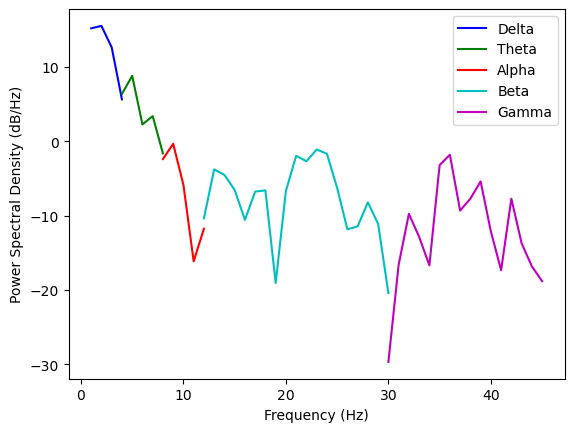

In [14]:
# Set up colors for each frequency band
colors = ['b', 'g', 'r', 'c', 'm']

# Initialize figure
plt.figure()

# Loop through each frequency band
for i, (band, (fmin, fmax)) in enumerate(freq_bands.items()):
    # Filter the raw data to the frequency band of interest
    raw_band = raw.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    # Plot PSD
    plt.plot(freqs, 10 * np.log10(psd), color=colors[i], label=band)

# Add legend
plt.legend()

# Set x and y axis labels
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')

# Show the figure
plt.show()





Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 4.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)
psd [33.14078955 35.6821289  18.35082126  3.66329162]
freqs [1. 2. 3. 4.]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)
psd [4.3365738  7.6041981  1.68533751 2.18071623 0.68673001]
freqs [4. 5. 6. 7. 8.]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Effective window size : 1.000 (s)
psd [0.09178701 0.41867639 0.35262796 0.22133667 0.08764341 0.21022471
 0.21831383 0.01234287 0.21455727 0.63704577 0.53836925 0.77340928
 0.68034176 0.2354478  0.06532183 0.0714748  0.1506973  0.07716303
 0.00903553]
freqs [12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.
 30.]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 30.00, 45.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)
psd [0.00107215 0.02169859 0.10537564 0.05172952 0.02136351 0.47834052
 0.6587623  0.11666546 0.16881704 0.28807881 0.06125661 0.01838511
 0.16896718 0.04235419 0.0207535  0.01309553]
freqs [30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


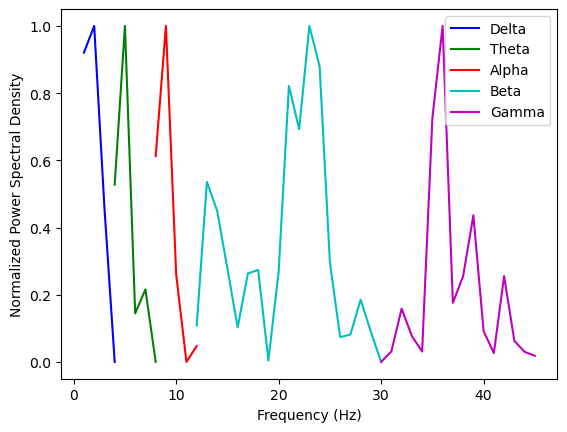

In [30]:
# Set up colors for each frequency band
colors = ['b', 'g', 'r', 'c', 'm']

# Initialize figure
plt.figure()

# Loop through each frequency band
for i, (band, (fmin, fmax)) in enumerate(freq_bands.items()):
    # Filter the raw data to the frequency band of interest
    raw_band = raw.copy().filter(fmin, fmax, method='iir')

    # Calculate power spectral density
    psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'], fmin=fmin, fmax=fmax)

    print("psd",psd)
    print("freqs",freqs)
    # Normalize PSD
    #normalized_psd = psd.mean(axis=0) / np.sum(psd.mean(axis=0))
    normalized_psd = (psd - np.min(psd)) / (np.max(psd) - np.min(psd))

    # Plot normalized PSD
    plt.plot(freqs, normalized_psd, color=colors[i], label=band)

# Add legend
plt.legend()

# Set x and y axis labels
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Power Spectral Density')

# Show the figure
plt.show()
